In [30]:
import sklearn
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error
import datetime
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False


In [31]:
train_df = pd.read_csv('./train_train.csv')
train_df

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg)
0,TG_A_J_20190101,2019-01-01,TG,A,J,0.0,0.0
1,TG_A_J_20190102,2019-01-02,TG,A,J,0.0,0.0
2,TG_A_J_20190103,2019-01-03,TG,A,J,60601.0,1728.0
3,TG_A_J_20190104,2019-01-04,TG,A,J,25000.0,1408.0
4,TG_A_J_20190105,2019-01-05,TG,A,J,32352.0,1250.0
...,...,...,...,...,...,...,...
43948,RD_F_J_20220127,2022-01-27,RD,F,J,522900.0,536.0
43949,RD_F_J_20220128,2022-01-28,RD,F,J,435800.0,588.0
43950,RD_F_J_20220129,2022-01-29,RD,F,J,422700.0,623.0
43951,RD_F_J_20220130,2022-01-30,RD,F,J,484440.0,481.0


In [32]:
sample_df = pd.read_csv('./sample_submission.csv')
sample_df

,ID,answer
0,TG_A_J_20230304,0
1,TG_A_J_20230305,0
2,TG_A_J_20230306,0
3,TG_A_J_20230307,0
4,TG_A_J_20230308,0
...,...,...
1087,RD_F_J_20230327,0
1088,RD_F_J_20230328,0
1089,RD_F_J_20230329,0
1090,RD_F_J_20230330,0


In [33]:
test_df = pd.read_csv('./train_test.csv')
test_df

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg)
0,TG_A_J_20220201,2022-02-01,TG,A,J,0.0,0.0
1,TG_A_J_20220202,2022-02-02,TG,A,J,0.0,0.0
2,TG_A_J_20220203,2022-02-03,TG,A,J,0.0,0.0
3,TG_A_J_20220204,2022-02-04,TG,A,J,535.5,6065.0
4,TG_A_J_20220205,2022-02-05,TG,A,J,5893.0,3113.0
...,...,...,...,...,...,...,...
1087,RD_F_J_20220224,2022-02-24,RD,F,J,478500.0,532.0
1088,RD_F_J_20220225,2022-02-25,RD,F,J,568800.0,520.0
1089,RD_F_J_20220226,2022-02-26,RD,F,J,478320.0,509.0
1090,RD_F_J_20220227,2022-02-27,RD,F,J,0.0,0.0


In [34]:
trade_df = pd.read_csv('./international_trade.csv')
trade_df

,기간,품목명,수출 중량,수출 금액,수입 중량,수입 금액,무역수지
0,2019-01,토마토(신선한 것이나 냉장한 것으로 한정한다),356571,990,0,0,990
1,2019-01,양파,821330,222,4003206,1118,-896
2,2019-01,쪽파,60,1,93405,128,-127
3,2019-01,꽃양배추와 브로콜리(broccoli),160,1,638913,563,-562
4,2019-01,방울다다기 양배추,0,0,7580,38,-38
...,...,...,...,...,...,...,...
1269,2023-02,포포(papaw)[파파야(papaya)],0,0,23830,71,-71
1270,2023-02,사과,135165,351,0,0,351
1271,2023-02,배,2206012,5411,1,0,5411
1272,2023-02,신 체리[프루너스 체라서스(Prunus cerasus)],5,0,0,0,0


In [35]:
train_df.head()

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg)
0,TG_A_J_20190101,2019-01-01,TG,A,J,0.0,0.0
1,TG_A_J_20190102,2019-01-02,TG,A,J,0.0,0.0
2,TG_A_J_20190103,2019-01-03,TG,A,J,60601.0,1728.0
3,TG_A_J_20190104,2019-01-04,TG,A,J,25000.0,1408.0
4,TG_A_J_20190105,2019-01-05,TG,A,J,32352.0,1250.0


In [36]:
train_df['timestamp'] = pd.to_datetime(train_df['timestamp'])
test_df['timestamp'] = pd.to_datetime(test_df['timestamp'])

In [37]:
# timestamp : year / month / day 쪼개기

train_df['year'] = train_df['timestamp'].dt.year
train_df['month'] = train_df['timestamp'].dt.month
train_df['day'] = train_df['timestamp'].dt.day
train_df['dayofweek'] = train_df['timestamp'].dt.dayofweek  ## 무슨요일인지 확인 

# test_df['year'] = test_df['timestamp'].dt.year
# test_df['month'] = df['timestamp'].dt.month
# test_df['day'] = df['timestamp'].dt.day
# test_df['dayofweek'] = test_df['timestamp'].dt.dayofweek

train_df.head(3)

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg),year,month,day,dayofweek
0,TG_A_J_20190101,2019-01-01,TG,A,J,0.0,0.0,2019,1,1,1
1,TG_A_J_20190102,2019-01-02,TG,A,J,0.0,0.0,2019,1,2,2
2,TG_A_J_20190103,2019-01-03,TG,A,J,60601.0,1728.0,2019,1,3,3


In [38]:
# item Encoding
#TG: 감귤 (1)
#BC: 브로콜리 (2)
#RD: 무 (3)
#CR: 당근 (4)
#CB: 양배추 (5)
def get_item(x):
    if x == 'TG':
        return 1
    elif x == 'BC':
        return 2
    elif x == 'RD':
        return 3
    elif x == 'CR':
        return 4
    elif x == 'CB':
        return 5
        

In [39]:
#corporation Encoding
#A: 1
#B: 2
#C: 3
#D: 4
#E: 5
#F: 6
def get_cor(x):
    if x == 'A':
        return 1
    elif x == 'B':
        return 2
    elif x == 'C':
        return 3
    elif x == 'D':
        return 4
    elif x == 'E':
        return 5
    elif x == 'F':
        return 6
        

In [40]:
#location Encoding
#J: 1
#S: 2

def get_loc(x):
    if x == 'J':
        return 1
    elif x == 'S':
        return 2

In [41]:
train_df['item'].apply(get_item)
train_df['corporation'].apply(get_cor)
train_df['location'].apply(get_loc) 

train_df['item_en'] = train_df['item'].apply(get_item)
train_df['cor_en'] = train_df['corporation'].apply(get_cor)
train_df['loc_en'] = train_df['location'].apply(get_loc)
train_df.head(3)

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg),year,month,day,dayofweek,item_en,cor_en,loc_en
0,TG_A_J_20190101,2019-01-01,TG,A,J,0.0,0.0,2019,1,1,1,1,1,1
1,TG_A_J_20190102,2019-01-02,TG,A,J,0.0,0.0,2019,1,2,2,1,1,1
2,TG_A_J_20190103,2019-01-03,TG,A,J,60601.0,1728.0,2019,1,3,3,1,1,1


In [42]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
X = train_df[['year','month','day','dayofweek','item_en','cor_en','loc_en']]
y = train_df[['price(원/kg)']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

In [43]:
model.fit(X_train,y_train)

LinearRegression()

In [44]:
y_pred_price = model.predict(X_test)
y_pred_price[:10]

array([[-383.28789759],
       [2003.57005177],
       [2253.70329234],
       [2860.52923235],
       [1880.86498591],
       [-315.76428267],
       [-423.2415595 ],
       [  79.14632755],
       [2278.72987559],
       [2667.60088608]])

In [45]:
root_mean_squared_error(y_test,y_pred_price)

1692.6217105533099

In [46]:
r2_score(y_test,y_pred_price)

0.2871563862280627

In [47]:
ohe = OneHotEncoder(sparse_output=False)

train_encoded_features = ohe.fit_transform(train_df[['item','corporation','location']])
train_item_encoded_df = pd.DataFrame(train_encoded_features, columns=ohe.get_feature_names_out(['item', 'corporation', 'location']))
train_df_encoded = pd.concat([train_df, train_item_encoded_df], axis = 1)

print(train_df_encoded)
# train_df_encoded.describe()
# train_df_encoded.info()

                    ID  timestamp item corporation location  supply(kg)  \
0      TG_A_J_20190101 2019-01-01   TG           A        J         0.0   
1      TG_A_J_20190102 2019-01-02   TG           A        J         0.0   
2      TG_A_J_20190103 2019-01-03   TG           A        J     60601.0   
3      TG_A_J_20190104 2019-01-04   TG           A        J     25000.0   
4      TG_A_J_20190105 2019-01-05   TG           A        J     32352.0   
...                ...        ...  ...         ...      ...         ...   
43948  RD_F_J_20220127 2022-01-27   RD           F        J    522900.0   
43949  RD_F_J_20220128 2022-01-28   RD           F        J    435800.0   
43950  RD_F_J_20220129 2022-01-29   RD           F        J    422700.0   
43951  RD_F_J_20220130 2022-01-30   RD           F        J    484440.0   
43952  RD_F_J_20220131 2022-01-31   RD           F        J         0.0   

       price(원/kg)  year  month  day  ...  item_RD  item_TG  corporation_A  \
0              0.0  2

In [48]:
model2 = LinearRegression()
X = train_df_encoded[['year','month','day','dayofweek','item_BC','item_CB','item_CR','item_RD','item_TG','corporation_A','corporation_B','corporation_C','corporation_D','corporation_E','corporation_F','location_J','location_S']]
y = train_df_encoded[['price(원/kg)']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

In [49]:
model.fit(X_train,y_train)

LinearRegression()

In [50]:
y_pred_price = model.predict(X_test)
y_pred_price[:10]

array([[ 461.49797383],
       [2712.63671112],
       [1531.46890759],
       [3701.97426848],
       [1060.7614773 ],
       [-437.6023114 ],
       [-545.97549931],
       [ 248.86131137],
       [1610.05885608],
       [3195.73966906]])

In [51]:
root_mean_squared_error(y_test,y_pred_price)

1568.9469856635972

In [52]:
r2_score(y_test,y_pred_price)

0.387521303784202

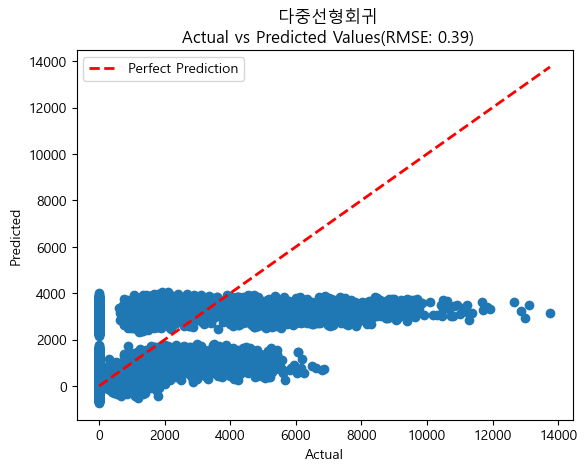

In [54]:
p = y_pred_price = model.predict(X_test)

model_name = ' 다중선형회귀'
rmse = r2_score(y_test,y_pred_price)

plt.scatter(y_test, p)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red', linewidth=2, label='Perfect Prediction')
plt.title(f'{model_name}\n Actual vs Predicted Values(RMSE: {round(rmse, 2)})')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()